# Project Country Data

## Importing neccesry libraries

In [57]:
import sys
import joblib
sys.modules['sklearn.externals.joblib']=joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import FastICA as ICA
from scipy.cluster.hierarchy import dendrogram, linkage as hc_linkage
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.metrics import silhouette_score as sscore, calinski_harabasz_score as chscore, davies_bouldin_score as dbscore
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
warnings.filterwarnings('ignore')

## Loading the dataset

In [58]:
country_df = pd.read_csv("https://raw.githubusercontent.com/Shalin06/dataset/main/Country-data.csv?token=GHSAT0AAAAAACACUW6MZYH7UPTTOUHOE5AGZBAATFA")
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Preprocessing

In [59]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [60]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [61]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Scalling the data 

In [62]:
X = country_df.copy()
Y = X["country"]
X = X.drop("country" ,axis = 1)
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## Vizualizing the data

<Axes: ylabel='Density'>

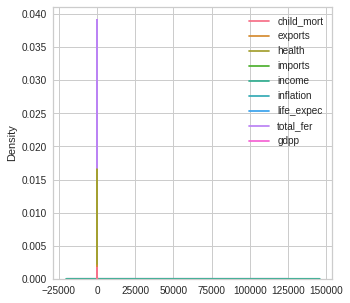

In [63]:
sns.kdeplot(data=X)

<Axes: ylabel='Density'>

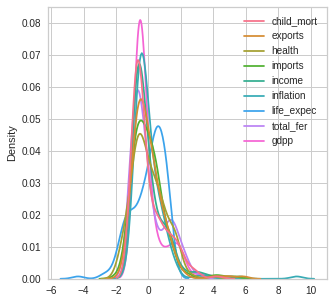

In [64]:
sns.kdeplot(data=X_scale)

[Text(0.5, 42.0, ''), Text(42.0, 0.5, '')]

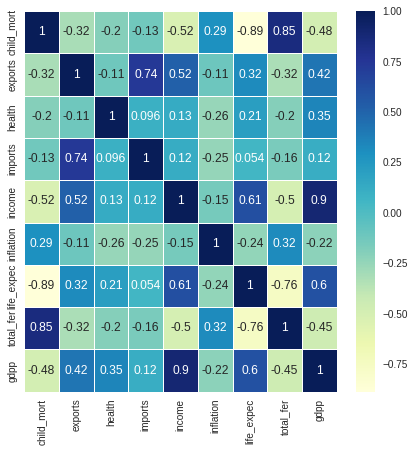

In [65]:
plt.rcParams["figure.figsize"] = (7,7)
ax = sns.heatmap(data = X.corr(),annot = True,cmap ='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")

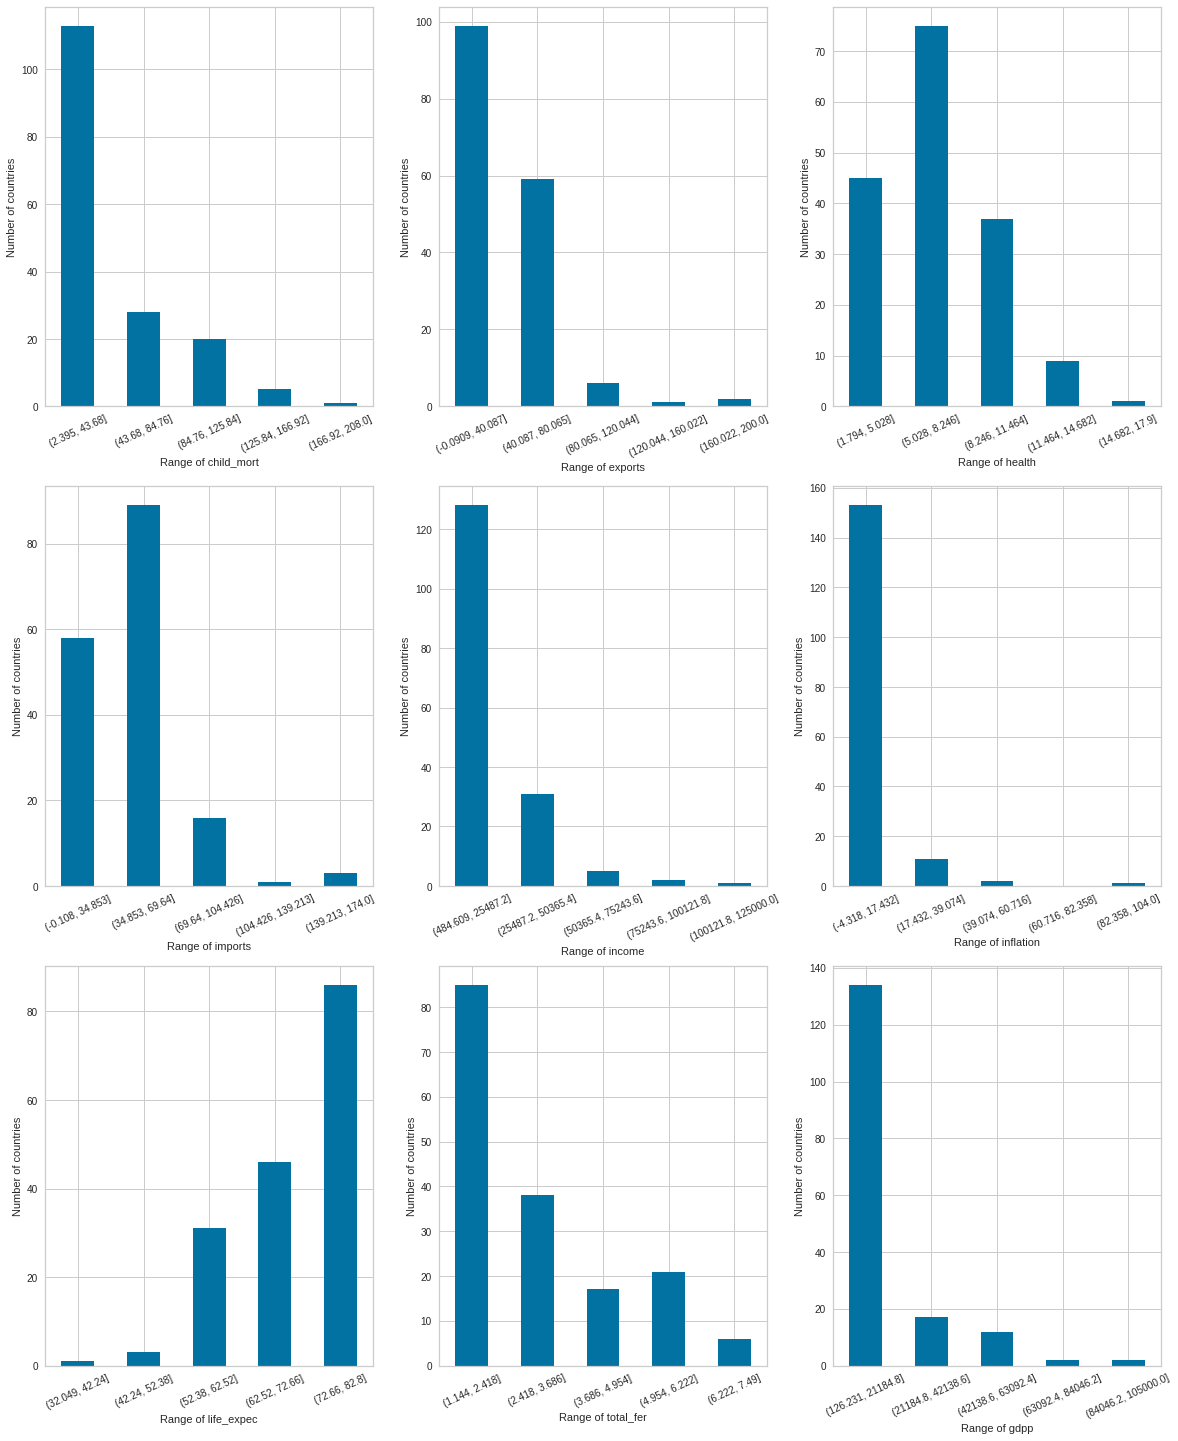

In [66]:
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = country_df[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Vizualize the scaled data

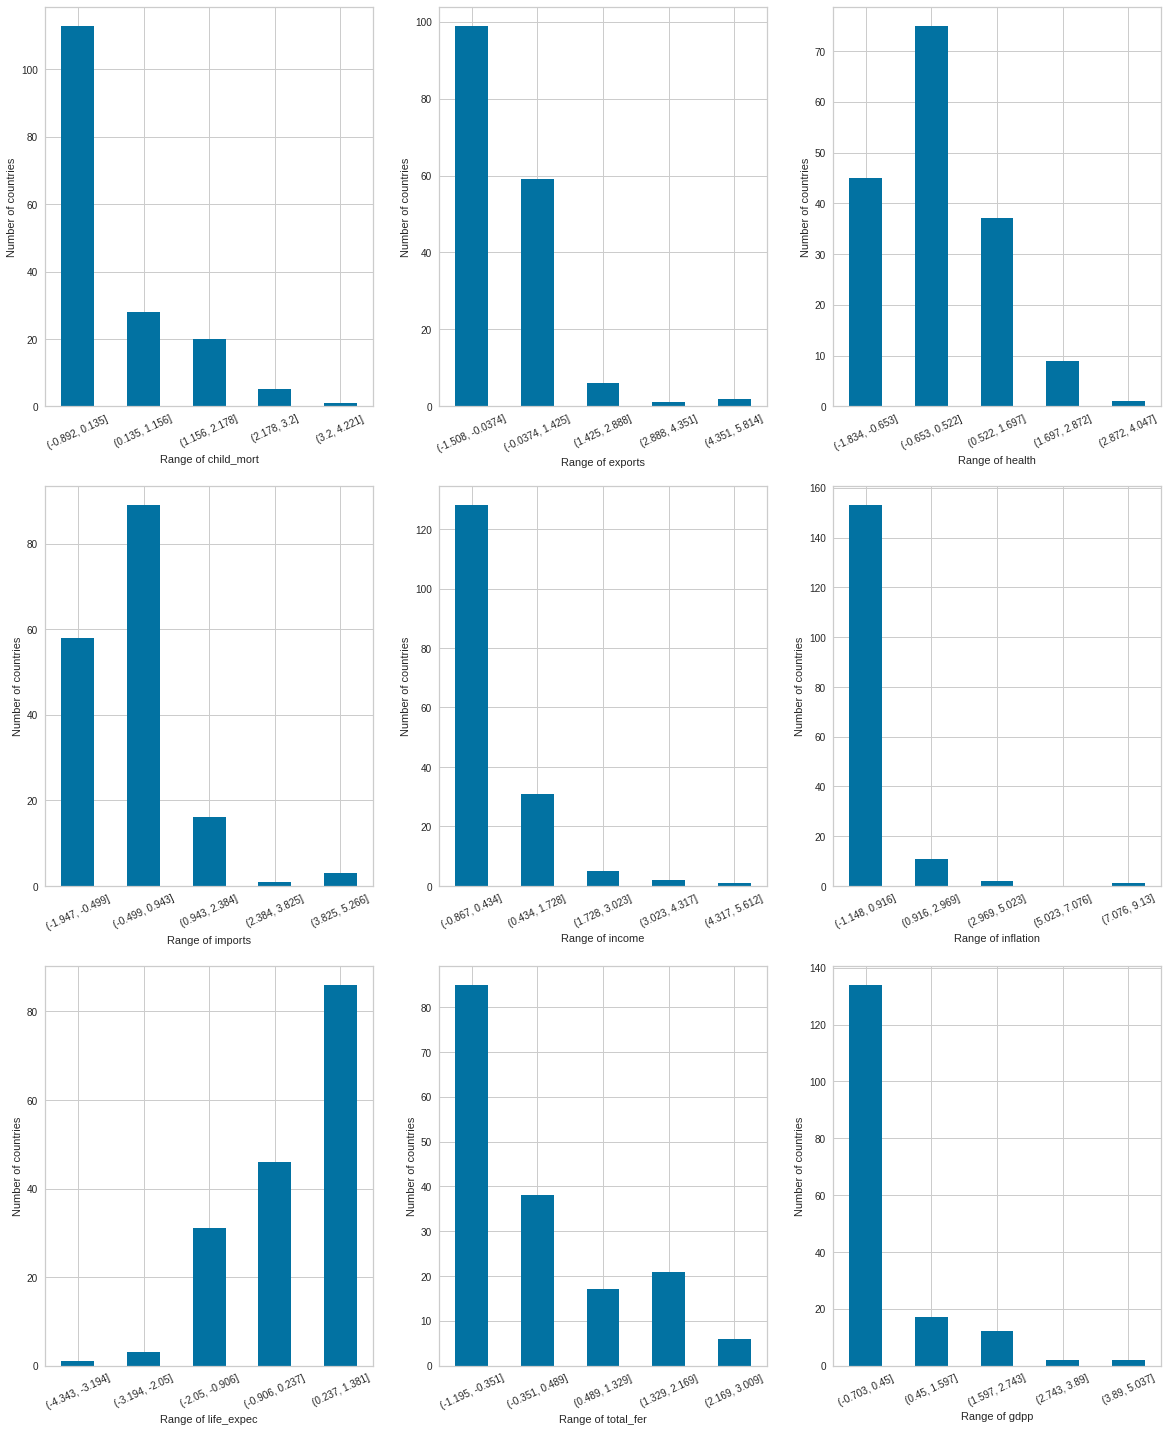

In [67]:
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Selecting essential features using PCA

In [68]:
pca = PCA()
pca.fit(X_scale)

PCA()

In [69]:
expalined_variance_ratio=pca.explained_variance_ratio_

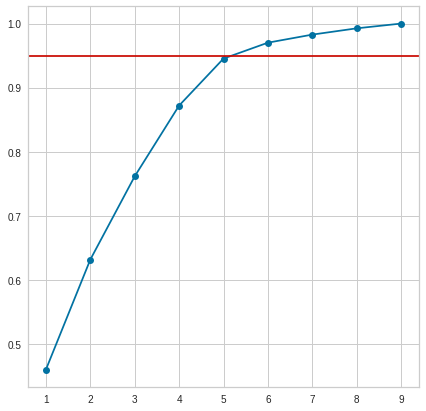

In [70]:
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

## Transforming Data

In [71]:
pca=PCA(n_components=5)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,6)])
X_transform


,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


## K_means clustering

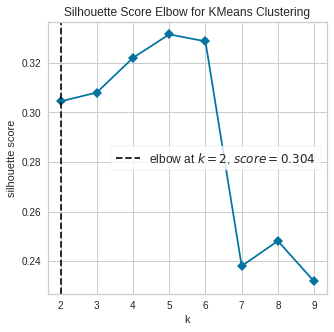

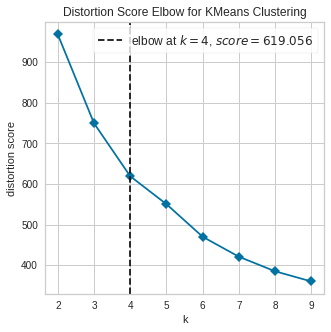

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

# plt.subplot(1,2,1)
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

# plt.subplot(1,2,2)
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),timings=False)
visualizer.fit(X_transform)
visualizer.show()

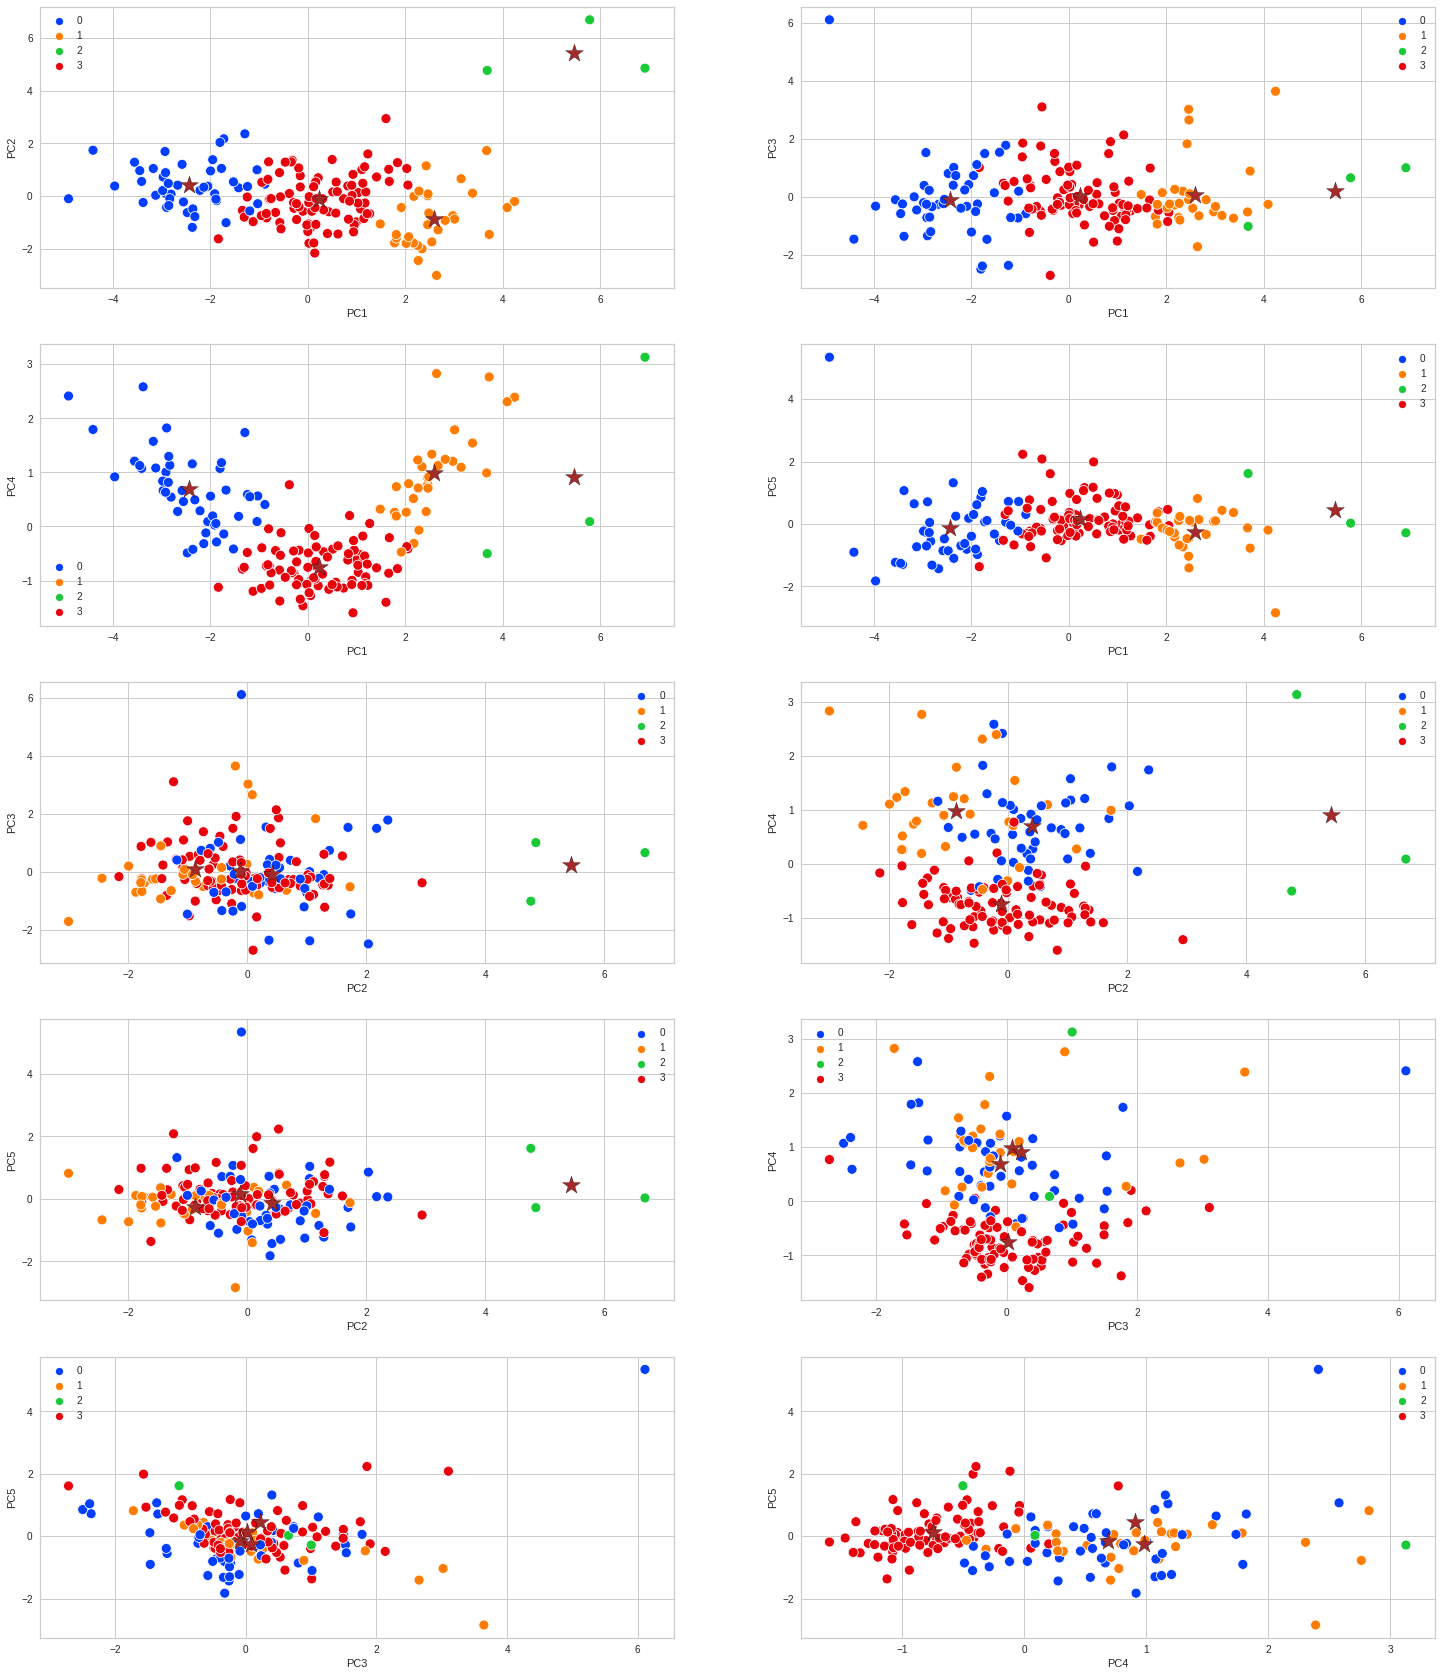

In [73]:
models_kmeans = KMeans(n_clusters = 4)
clusters = models_kmeans.fit_predict(X_transform)
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
centroids_kmeans = models_kmeans.cluster_centers_
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100,alpha = 1)
      ax.scatter(centroids_kmeans[:,j],centroids_kmeans[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black')
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [74]:
country_labels_kmeans = models_kmeans.labels_
country_labels_kmeans

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 0, 1, 3, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3,
       0, 2, 3, 1, 3, 0, 1, 1, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0], dtype=int32)

In [75]:
unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 47	28.14%
Class 1: 30	17.96%
Class 2: 3	1.80%
Class 3: 87	52.10%



## Gaussian Clustering

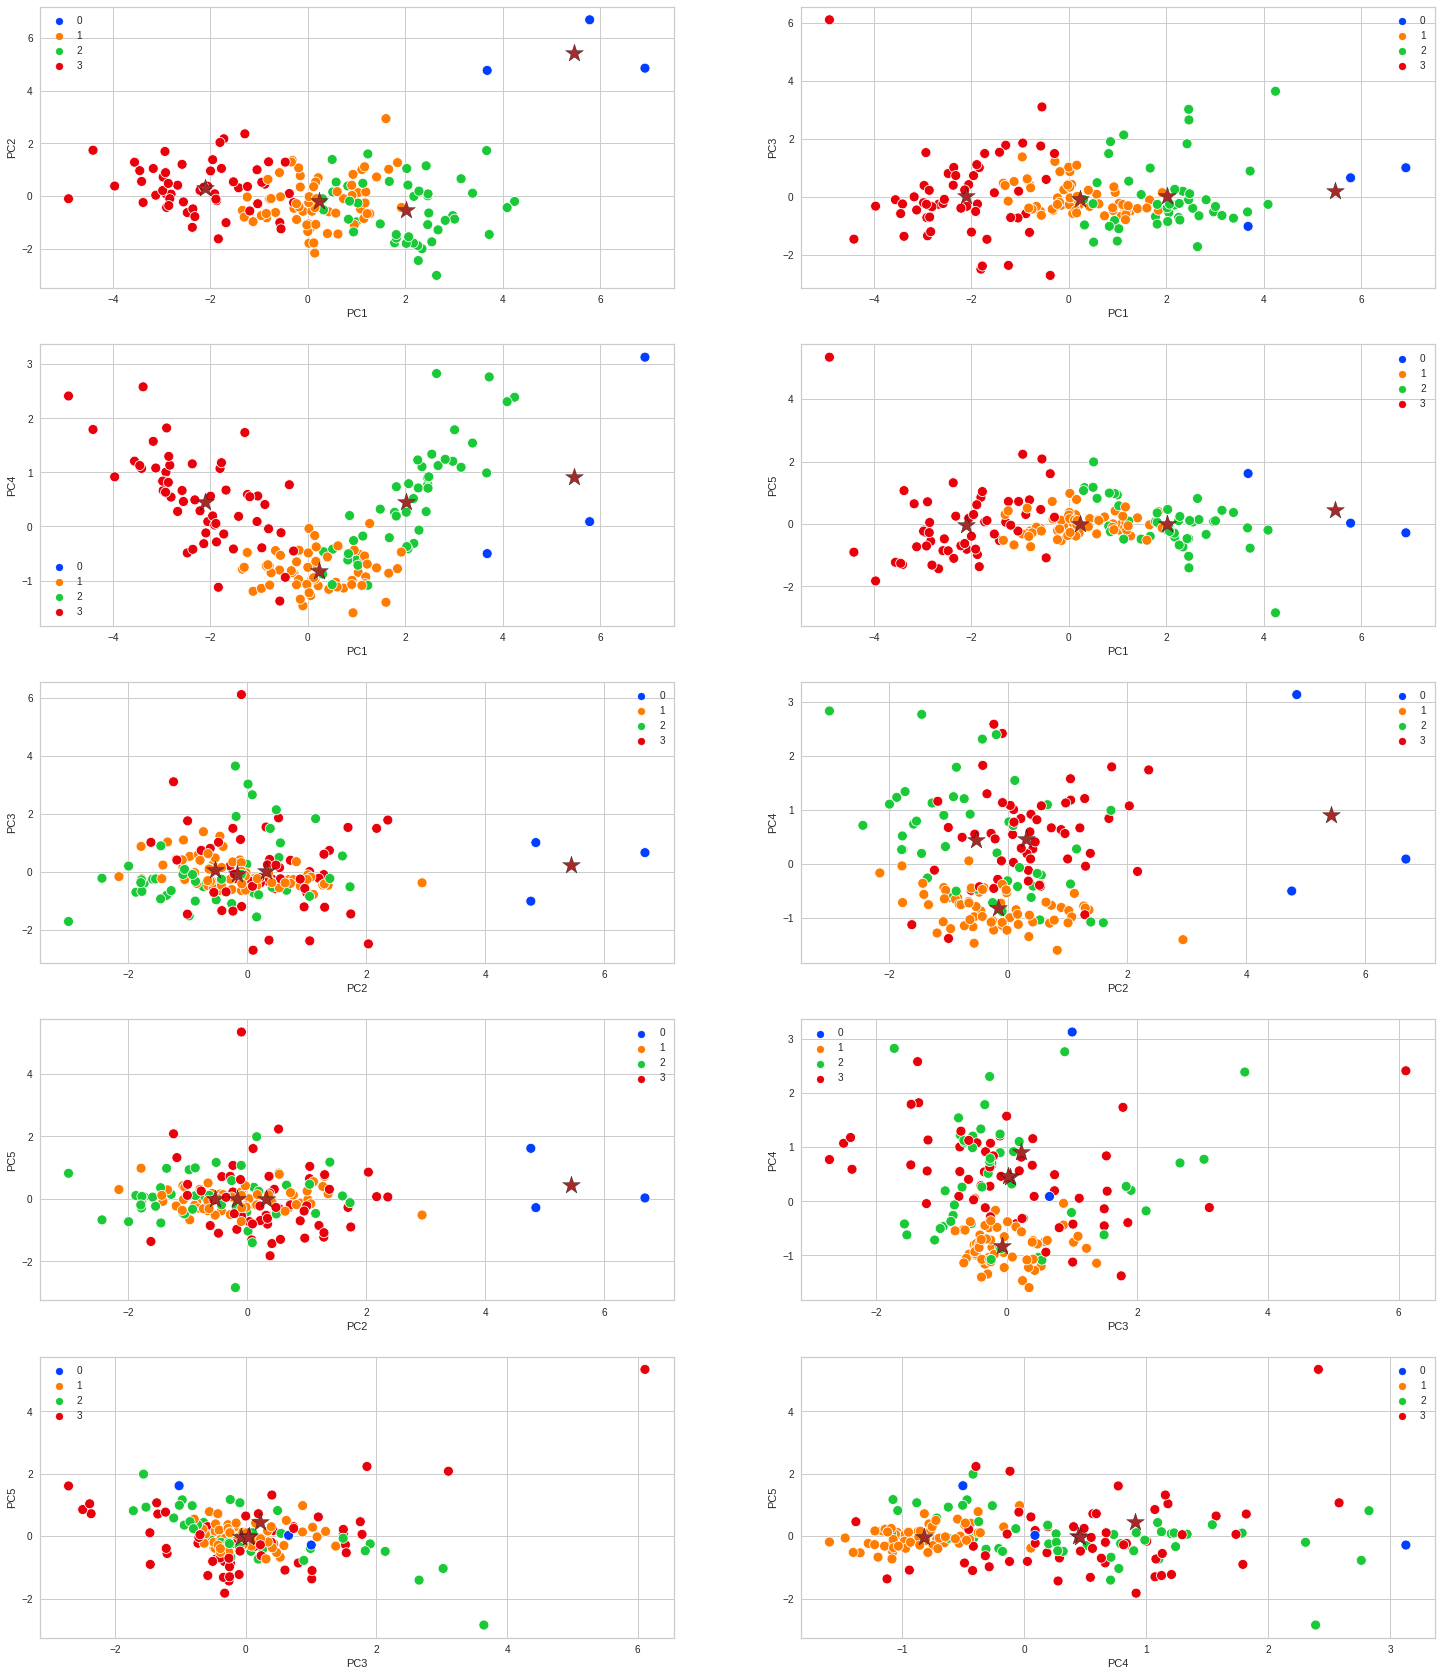

In [76]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X_transform)

country_labels_gaussian = gmm.predict(X_transform)
centroids_guassian = gmm.means_
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_gaussian,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_guassian[:,j],centroids_guassian[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [77]:
unique_labels, counts = np.unique(country_labels_gaussian, return_counts=True)
percentages = counts / len(country_labels_gaussian) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 3	1.80%
Class 1: 64	38.32%
Class 2: 45	26.95%
Class 3: 55	32.93%



## Hierarchial Clustering

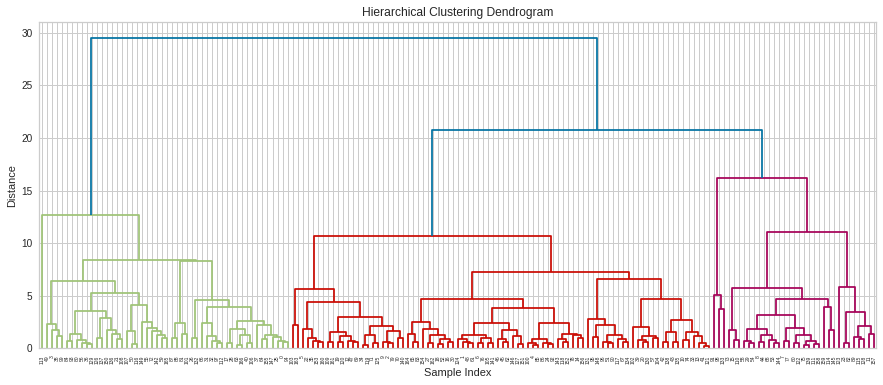

In [78]:
Z = linkage(X_transform, method='ward', metric='euclidean')

plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

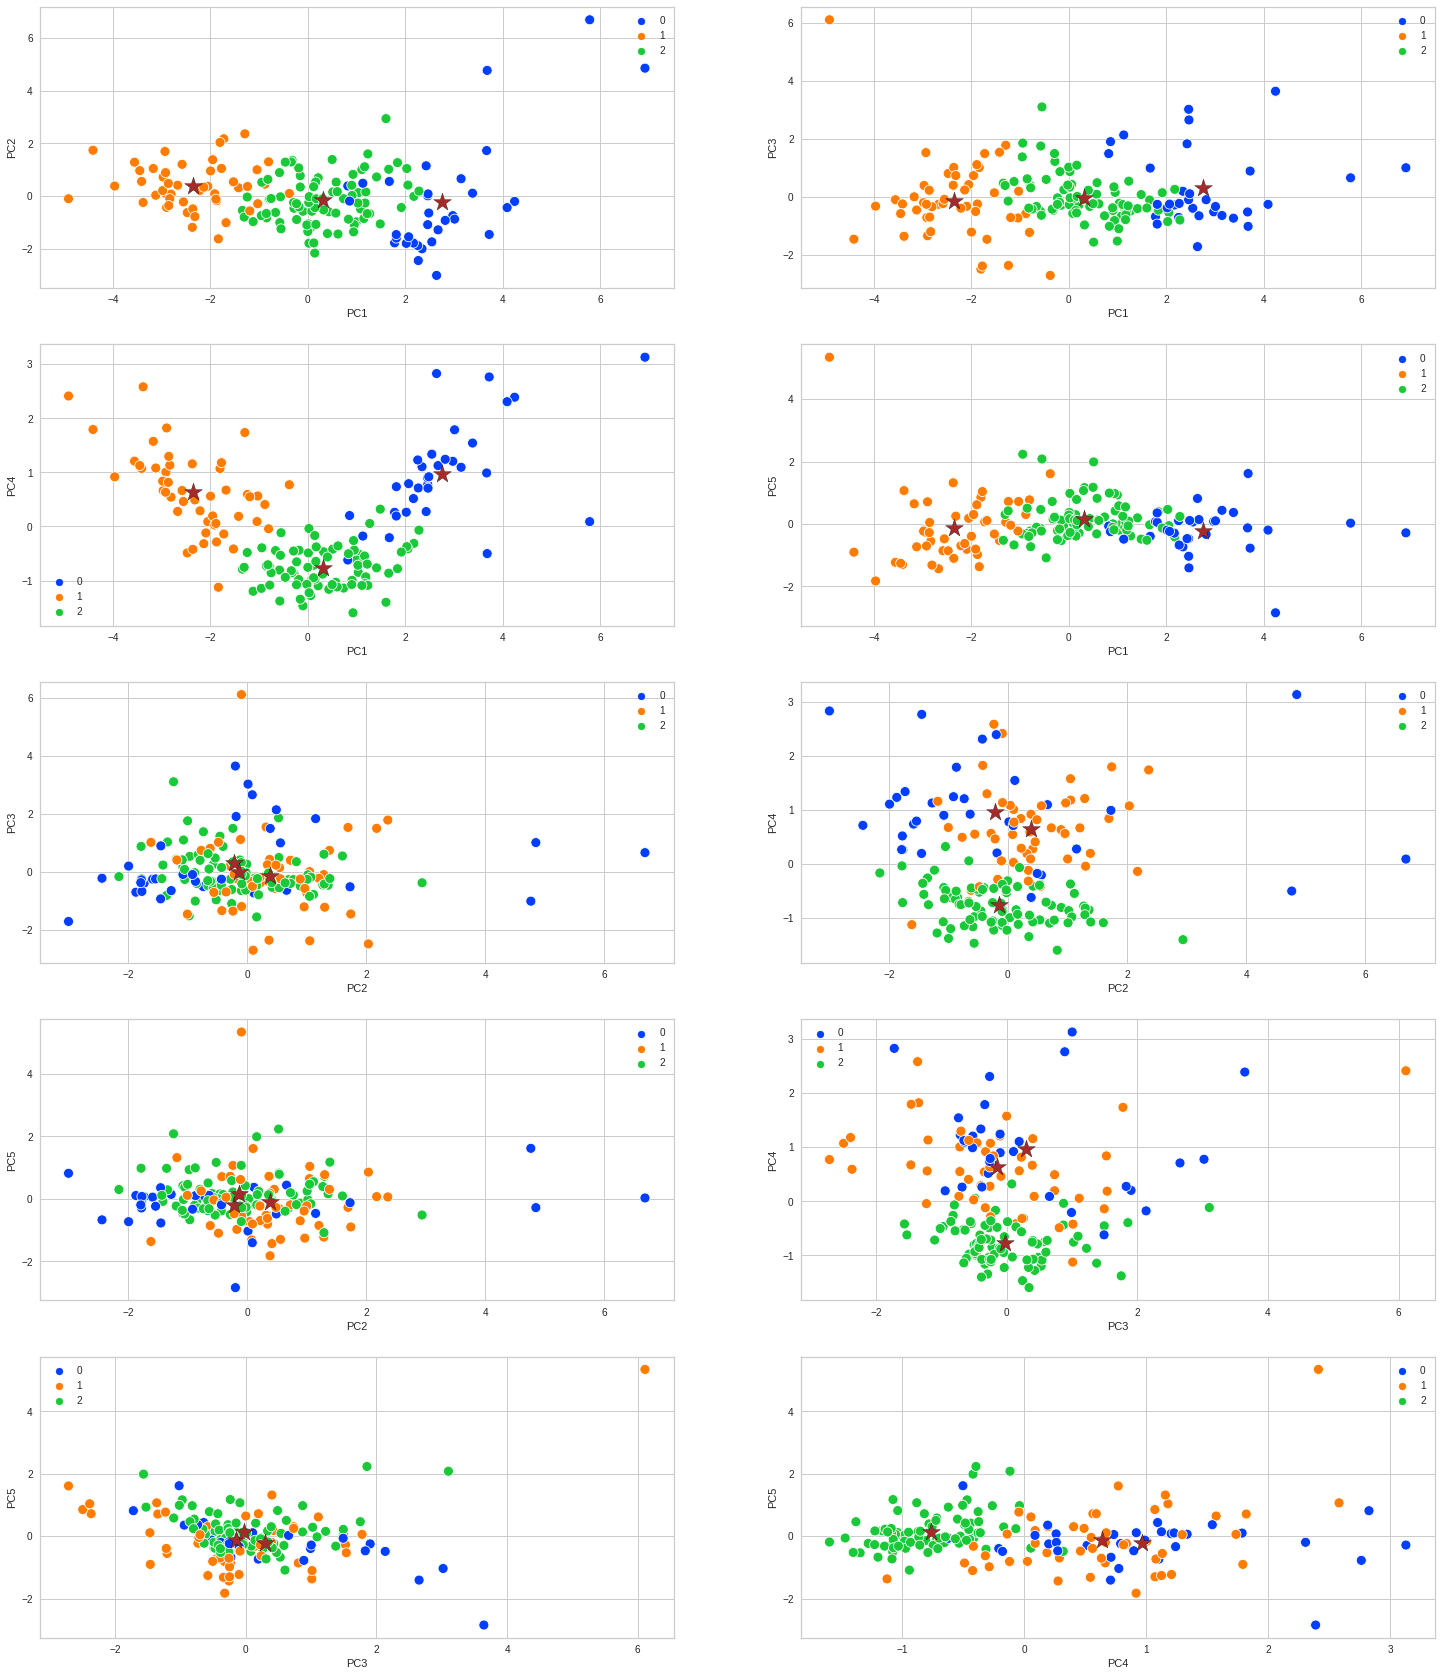

In [79]:
model_hir_agg = AgglomerativeClustering(n_clusters=3)
model_hir_agg.fit(X_transform)
country_labels_hir_agg = model_hir_agg.labels_


X_transform['country_labels_hir_agg']=country_labels_hir_agg
centroids_hir_agg=X_transform.groupby('country_labels_hir_agg').mean().values
X_transform.drop('country_labels_hir_agg',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_hir_agg,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_hir_agg[:,j],centroids_hir_agg[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [80]:
unique_labels, counts = np.unique(country_labels_hir_agg, return_counts=True)
percentages = counts / len(country_labels_hir_agg) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 33	19.76%
Class 1: 50	29.94%
Class 2: 84	50.30%



## DBScan Clustering

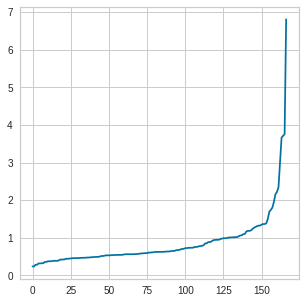

In [81]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transform)
distances, indices = nbrs.kneighbors(X_transform)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 5,5
plt.plot(distances)

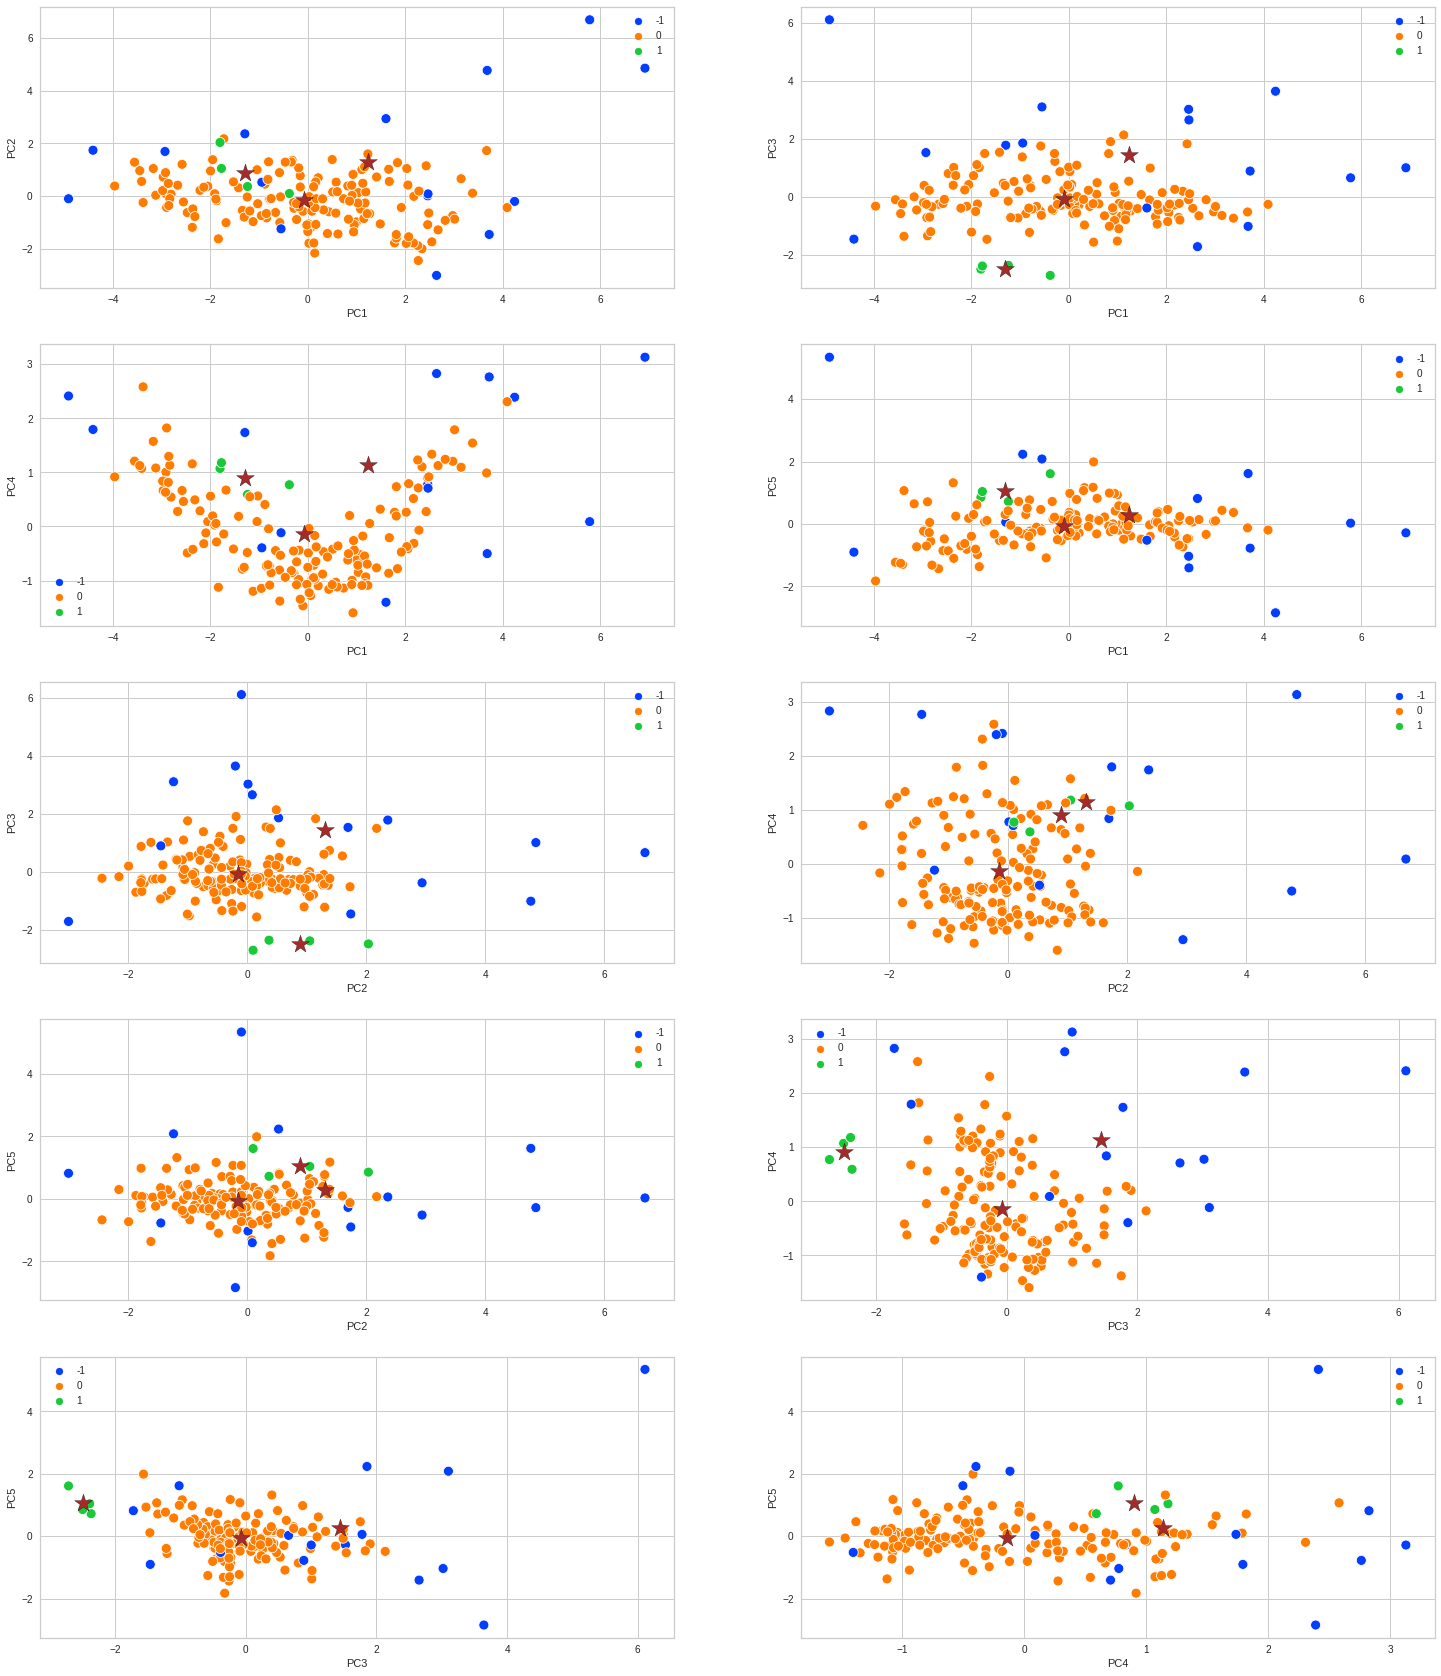

In [82]:
db = DBSCAN(eps = 1.5, min_samples = 3 )# minimum samples is set to 8
db.fit(X_transform)

country_labels_dbscan = db.labels_

X_transform['country_labels_dbscan']=country_labels_dbscan
centroids_dbscan=X_transform.groupby('country_labels_dbscan').mean().values
X_transform.drop('country_labels_dbscan',axis=1,inplace=True)

fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j+1,len(cols)):
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = country_labels_dbscan,palette='bright',ax= ax,s = 100)
      ax.scatter(centroids_dbscan[:,j],centroids_dbscan[:,k], marker = "*",s = 350,color = 'brown',edgecolor = 'black') 
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

## Evaluating the Clustering

In [83]:
print("Gaussian",sscore(X_transform, country_labels_gaussian, metric='euclidean'))

Gaussian 0.22642080388715022


In [84]:
print("KMeans",sscore(X_transform,country_labels_kmeans,metric = 'euclidean'))

KMeans 0.32718347402877207


In [85]:
print("alggomorative",sscore(X_transform,country_labels_hir_agg,metric = 'euclidean'))

alggomorative 0.30427188416905565


In [86]:
print("Dbscan",sscore(X_transform,country_labels_dbscan,metric = 'euclidean'))

Dbscan 0.1929253329808842


In [87]:
country_df['labels']=country_labels_kmeans

unique_labels, counts = np.unique(country_labels_kmeans, return_counts=True)
percentages = counts / len(country_labels_kmeans) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

Value counts:
Class 0: 47	28.14%
Class 1: 30	17.96%
Class 2: 3	1.80%
Class 3: 87	52.10%



In [88]:
country_df.groupby('labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448


In [89]:
for label,c in zip(np.unique(country_df['labels']),['Developing','Under Developed','Fully Developed','Developed']):
    print(c)
    print(country_df[country_df['labels']==label].values[:,0])
    print('\n')
    
    


Developing
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']


Under Developed
['Australia' 'Austria' 'Belgium' 'Brunei' 'Canada' 'Cyprus' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Netherlands' 'New Zealand' 'Norway' 'Portugal'
 'Qatar' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']


Fully Developed
['Luxembourg' 'Malta' 'Singapore']


Developed
['Albania' 'Algeria' 'Antigua and Barbuda'

In [90]:
country_df.replace([0,1,2,3],['Developing','Under Developed','Fully Developed','Developed'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developed
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developed
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developed
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developed
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developed
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developed
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Developing


In [91]:
!pip install geopandas
import geopandas as gpd

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import tensorflow_hub as hub
import tensorflow as tf

from_country = country_df['country']
to_country = world['name']

#GloVe embeddings
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

similarity_score=[]
# Mapping function
def map_country_names(name):
    max_similarity = 0
    best_match = None
    for country_name in to_country:
        similarity = embed([name.lower()]).numpy().dot(embed([country_name.lower()]).numpy().T)
        if similarity > max_similarity:
            best_match = country_name
            max_similarity = similarity
    similarity_score.append(max_similarity)
    return best_match

map_list=[]

#Map from_country to to_country
map_dict_country={}
for name in from_country:
    mapped_name = map_country_names(name)
    map_dict_country[name]=mapped_name
    map_list.append(mapped_name)

In [93]:
map_dict_country

{'Afghanistan': 'Afghanistan',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'Angola': 'Angola',
 'Antigua and Barbuda': 'Trinidad and Tobago',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'Bahamas': 'Bahamas',
 'Bahrain': 'Saudi Arabia',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Bhutan',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia',
 'Bosnia and Herzegovina': 'Bosnia and Herz.',
 'Botswana': 'Botswana',
 'Brazil': 'Brazil',
 'Brunei': 'Brunei',
 'Bulgaria': 'Bulgaria',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada': 'Canada',
 'Cape Verde': 'Panama',
 'Central African Republic': 'Central African Rep.',
 'Chad': 'Chad',
 'Chile': 'Chile',
 'China': 'China',
 'Colombia': 'Colombia',
 'Comoros': 'Nicaragua',
 'Congo, Dem. Rep.': 'Dem. Rep. Congo',
 'Co

In [94]:
#GloVe mapped
cnt=0
for i in map_dict_country:
    if(map_dict_country[i]!=i):
        print(i,'<-->',map_dict_country[i])
        cnt+=1

print("Total not exact matches :",cnt)

Antigua and Barbuda <--> Trinidad and Tobago
Bahrain <--> Saudi Arabia
Barbados <--> Bhutan
Bosnia and Herzegovina <--> Bosnia and Herz.
Cape Verde <--> Panama
Central African Republic <--> Central African Rep.
Comoros <--> Nicaragua
Congo, Dem. Rep. <--> Dem. Rep. Congo
Congo, Rep. <--> Dem. Rep. Congo
Cote d'Ivoire <--> Côte d'Ivoire
Czech Republic <--> Russia
Dominican Republic <--> Saudi Arabia
Equatorial Guinea <--> Guinea
Grenada <--> Romania
Kiribati <--> Qatar
Kyrgyz Republic <--> United Kingdom
Lao <--> Sri Lanka
Macedonia, FYR <--> Solomon Is.
Maldives <--> Timor-Leste
Malta <--> Italy
Mauritius <--> Rwanda
Micronesia, Fed. Sts. <--> Tajikistan
Samoa <--> Bulgaria
Seychelles <--> Guyana
Singapore <--> Australia
Slovak Republic <--> Moldova
Solomon Islands <--> Solomon Is.
St. Vincent and the Grenadines <--> Trinidad and Tobago
Tonga <--> Mali
United States <--> United States of America
Total not exact matches : 30


In [95]:
#country names in world
np.sort(np.array(world['name']))

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [96]:
flattened_score_similarity = np.concatenate(similarity_score).flatten()
# print(flattened_score_similarity)
np.sum(flattened_score_similarity<0.80)

25

In [97]:
#incorrect mapping by similarity score
arr=[]
for i,value in enumerate(flattened_score_similarity):
    if(value<0.7):
        arr.append(from_country[i]+'<-->'+map_list[i])

print(arr)

['Antigua and Barbuda<-->Trinidad and Tobago', 'Bosnia and Herzegovina<-->Bosnia and Herz.', 'Cape Verde<-->Panama', 'Comoros<-->Nicaragua', 'Czech Republic<-->Russia', 'Dominican Republic<-->Saudi Arabia', 'Grenada<-->Romania', 'Kiribati<-->Qatar', 'Kyrgyz Republic<-->United Kingdom', 'Lao<-->Sri Lanka', 'Macedonia, FYR<-->Solomon Is.', 'Maldives<-->Timor-Leste', 'Malta<-->Italy', 'Mauritius<-->Rwanda', 'Micronesia, Fed. Sts.<-->Tajikistan', 'Seychelles<-->Guyana', 'Singapore<-->Australia', 'Slovak Republic<-->Moldova', 'Solomon Islands<-->Solomon Is.', 'St. Vincent and the Grenadines<-->Trinidad and Tobago', 'Tonga<-->Mali']


In [98]:
# HAND MAPPING incorrect classified one
incorrect=['Antigua and Barbuda', 'Bahrain','Barbados','Cape Verde','Comoros','Czech Republic','Dominican Republic','Grenada',
           'Kiribati','Kyrgyz Republic','Macedonia, FYR','Maldives','Malta','Mauritius','Micronesia, Fed. Sts.','Samoa','Seychelles','Singapore','Slovak Republic',
           'St. Vincent and the Grenadines','Tonga']

len(incorrect)

21

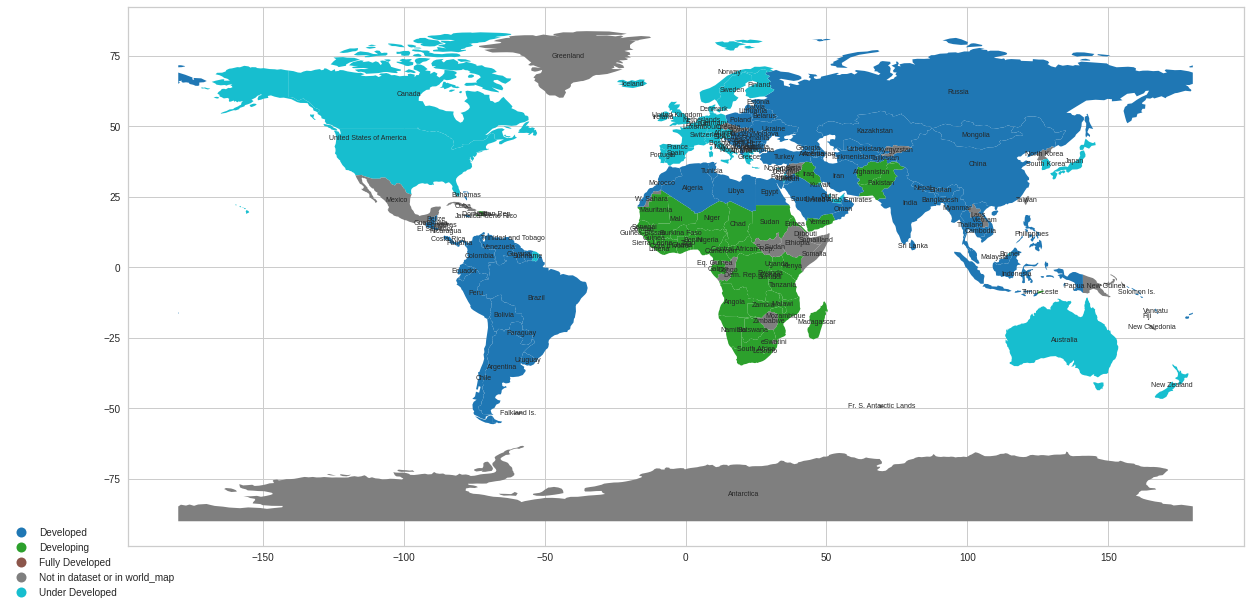

In [99]:
import matplotlib as mpl

label_colors = {}
map_cntry_to_label = {}
bol=False
for label, c in zip(np.unique(country_df['labels']), ['Developing', 'Under Developed', 'Fully Developed', 'Developed']):
    for i in country_df[country_df['labels'] == label].values[:,0]:
        if i not in incorrect:
            map_cntry_to_label[map_dict_country[i]] = c
            label_colors[c] = mpl.colors.to_hex(mpl.cm.get_cmap('tab10')(label))

for name in world['name']:
    if name not in map_dict_country.values():
        map_cntry_to_label[name] = 'Not in dataset or in world_map'
        label_colors['Not in dataset or in world_map'] = '#cccccc'

world['color'] = world['name'].map(map_cntry_to_label)


# create the plot
fig, ax = plt.subplots(figsize=(20, 22))
world.plot(column='color', ax=ax, legend=True)

# Add country names to the plot
for idx, row in world.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], ha='center', va='center', fontsize=7)

legend = ax.get_legend()
legend.set_bbox_to_anchor((0.05, 0.05))